Data Preparation

In [1]:
# Define the file paths for the input .txt files
file1_path =  r'C:\Users\picik\sentiment+labelled+sentences (1)\sentiment labelled sentences\amazon_cells_labelled.txt'
file2_path =  r'C:\Users\picik\sentiment+labelled+sentences (1)\sentiment labelled sentences\imdb_labelled.txt'
file3_path =  r'C:\Users\picik\sentiment+labelled+sentences (1)\sentiment labelled sentences\yelp_labelled.txt'

# Define the file path for the output combined .txt file
output_file_path = r'C:\Users\picik\sentiment+labelled+sentences (1)\sentiment labelled sentences\combined.txt'

# Open the first file in read mode with UTF-8 encoding and the output file in write mode with UTF-8 encoding
with open(file1_path, 'r', encoding='utf-8') as file1, open(output_file_path, 'w', encoding='utf-8') as combined_file:
    # Read and write the contents of the first file
    combined_file.write(file1.read())

# Open the second file in read mode with UTF-8 encoding and the output file in append mode with UTF-8 encoding
with open(file2_path, 'r', encoding='utf-8') as file2, open(output_file_path, 'a', encoding='utf-8') as combined_file:
    # Read and append the contents of the second file
    combined_file.write(file2.read())

# Open the third file in read mode with UTF-8 encoding and the output file in append mode with UTF-8 encoding
with open(file3_path, 'r', encoding='utf-8') as file3, open(output_file_path, 'a', encoding='utf-8') as combined_file:
    # Read and append the contents of the third file
    combined_file.write(file3.read())

print("Combination complete. The contents of the three files are combined into 'combined.txt'.")


Combination complete. The contents of the three files are combined into 'combined.txt'.


In [2]:
import csv

# Define the input file path
input_file_path = r'C:\Users\picik\sentiment+labelled+sentences (1)\sentiment labelled sentences\combined.txt'

# Define the output file path
output_file_path = r'C:\Users\picik\sentiment+labelled+sentences (1)\sentiment labelled sentences\combined.csv'

# Try reading the data from the input file with different encodings
encodings_to_try = ['utf-8', 'latin-1', 'cp1252']  # Add more encodings as needed

for encoding in encodings_to_try:
    try:
        with open(input_file_path, "r", encoding=encoding) as f:
            lines = f.read().splitlines()
        break  # If successful, exit the loop
    except UnicodeDecodeError:
        continue

# Initialize an empty list to store the data in a CSV format
data = []

# Process each line and split it into the input and label
for line in lines:
    entry = line.split('\t')
    if len(entry) == 2:
        input_text, label = entry
        data.append([input_text, label])

# Write the data to a CSV file
with open(output_file_path, "w", newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    # Write the header row
    writer.writerow(["input", "label"])
    # Write the data rows
    writer.writerows(data)

print(f"Conversion complete. Data saved to {output_file_path}")


Conversion complete. Data saved to C:\Users\picik\sentiment+labelled+sentences (1)\sentiment labelled sentences\combined.csv


In [3]:
import pandas as pd

# Load the dataset using pandas
csv_file = r'C:\Users\picik\sentiment+labelled+sentences (1)\sentiment labelled sentences\combined.csv'
df = pd.read_csv(csv_file)

In [4]:
print(df)

                                                  input  label
0     So there is no way for me to plug it in here i...      0
1                           Good case, Excellent value.      1
2                                Great for the jawbone.      1
3     Tied to charger for conversations lasting more...      0
4                                     The mic is great.      1
...                                                 ...    ...
2995  I think food should have flavor and texture an...      0
2996                           Appetite instantly gone.      0
2997  Overall I was not impressed and would not go b...      0
2998  The whole experience was underwhelming, and I ...      0
2999  Then, as if I hadn't wasted enough of my life ...      0

[3000 rows x 2 columns]


In [5]:
import pandas as pd

# my functions
import HELP1.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(df, 'input'), columns=['input'])

In [6]:
X[0:4]


,input
0,So there is no way for me to plug it in here i...
1,"Good case, Excellent value."
2,Great for the jawbone.
3,Tied to charger for conversations lasting more...


In [7]:
# add label to the dataframe
X['label'] = df.label

In [8]:
X[0:10]

,input,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [9]:
#Filter rowa based on condition. For example here we filter rows where category is equal to 0. 
filtered_rows = X[X['label'] == 0]
filtered_rows

,input,label
0,So there is no way for me to plug it in here i...,0
3,Tied to charger for conversations lasting more...,0
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
8,"Needless to say, I wasted my money.",0
...,...,...
2995,I think food should have flavor and texture an...,0
2996,Appetite instantly gone.,0
2997,Overall I was not impressed and would not go b...,0
2998,"The whole experience was underwhelming, and I ...",0


In [10]:
 #Here, we are sorting the Dataframe by category in ascending order.
sorted_data = X.sort_values(by='label', ascending=True)
sorted_data

,input,label
0,So there is no way for me to plug it in here i...,0
1598,Every element of this story was so over the to...,0
1591,Which is precisely why I am giving it such a b...,0
1590,I can't believe there's even a sequel to this!,0
1589,"Beware: this is not a trashy cult movie, this ...",0
...,...,...
591,Linked to my phone without effort.,1
1775,You won't forget this movie!,1
1774,Also the music by Mark Snow is possibly the be...,1
1772,You learn a lot about the real inside emotions...,1


In [11]:
# check missing values
X.isnull()

,input,label
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
2995,False,False
2996,False,False
2997,False,False
2998,False,False


In [12]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,input,label
0,The amount of missing records is:,The amount of missing records is:
1,0,0


In [13]:
dummy_series = pd.Series(["dummy_record", 1], index=["input", "label"])
dummy_series

input    dummy_record
label               1
dtype: object

In [14]:
dummy_series.to_frame().T


,input,label
0,dummy_record,1


In [15]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)


In [16]:
len(result_with_series)

3001

In [17]:
X.dropna(inplace=True)


In [18]:
len(X)


3000

In [19]:
#Data sampling
print(X.shape)
X_sample = X.sample(n=1000,random_state=42) #random state
display(X_sample)

(3000, 2)


,input,label
1801,Avoid at ALL costs!,0
1190,"Garbo, who showed right off the bat that her t...",1
1817,You will leave the theater wanting to go out a...,1
251,O my gosh the best phone I have ever had.,1
2505,I would not recommend this place.,0
...,...,...
618,You need two hands to operate the screen.This ...,0
406,It's so stupid to have to keep buying new char...,0
1157,I had to walk out of the theatre for a few min...,0
1068,This movie totally grates on my nerves.,0


In [20]:
sorted_data_sample = X_sample.sort_values(by='label', ascending=True)
sorted_data_sample

,input,label
1801,Avoid at ALL costs!,0
168,doesn't last long.,0
2376,I took back my money and got outta there.,0
1738,The plot has more holes than a pair of fishnet...,0
2275,"I've had better, not only from dedicated boba ...",0
...,...,...
599,"For the price on Amazon, it is an excellent pr...",1
1756,This early film from future goremeister Lucio ...,1
1323,"The ending is so, SO perfect... you'll shed a ...",1
2863,I love their fries and their beans.,1


label
0    1500
1    1500
Name: count, dtype: int64


<Axes: title={'center': 'Distribution for X'}, xlabel='label'>

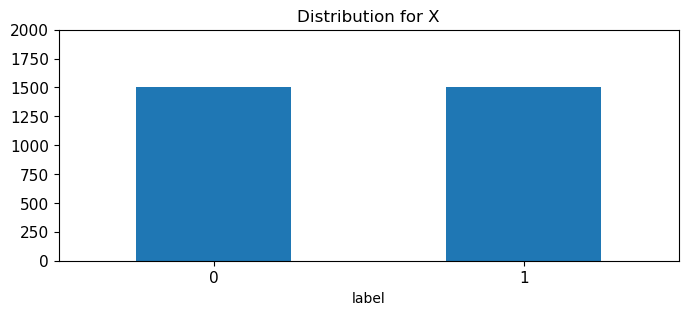

In [25]:
print(X.label.value_counts())

# plot barchart for X
X.label.value_counts().plot(kind = 'bar',
                                    title = 'Distribution for X',
                                    ylim = [0, 2000],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

501
label
1    501
0    499
Name: count, dtype: int64


<Axes: title={'center': 'Distribution for X.sample'}, xlabel='label'>

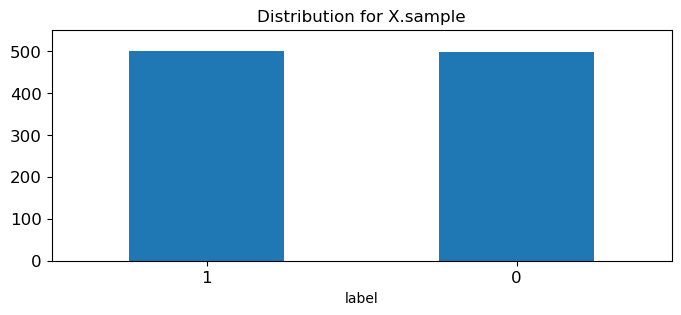

In [26]:
print(max(X_sample.label.value_counts()))
upper_bound = max(X_sample.label.value_counts() + 50) #277 + 50
print(X_sample.label.value_counts())

X_sample.label.value_counts().plot(kind = 'bar',
                                           title = 'Distribution for X.sample',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

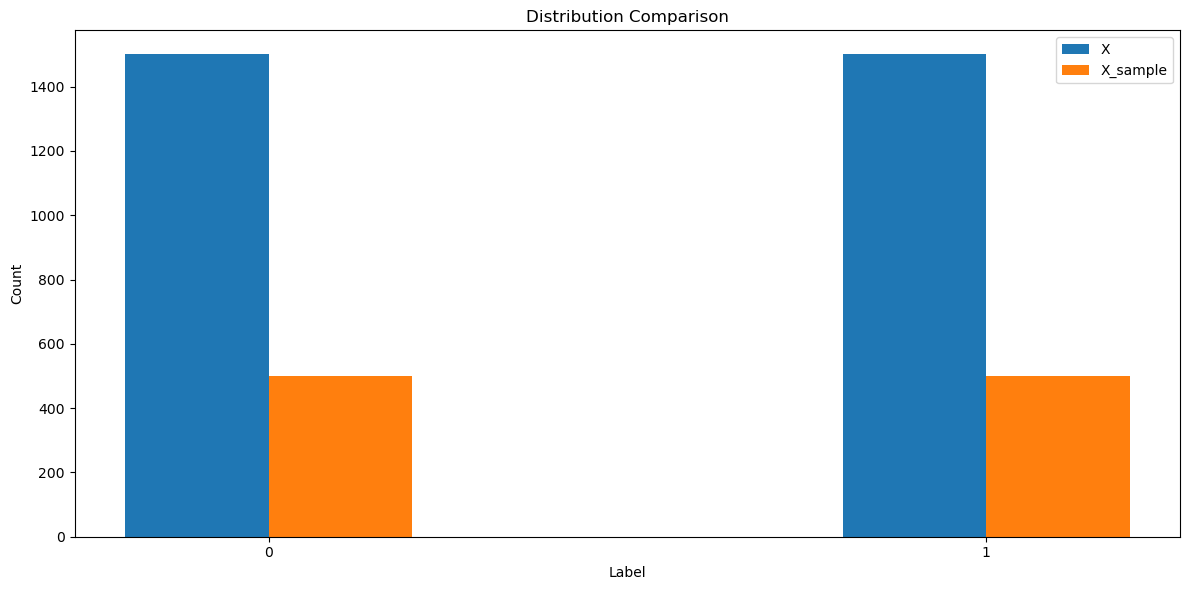

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

# Get value counts for 'category_name' in both datasets
X_counts = X.label.value_counts()
X_sample_counts = X_sample.label.value_counts()

# Categories
label = X_counts.index
x = range(len(label))

# Bar width
bar_width = 0.2

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bar chart for X
ax.bar([i - bar_width/2 for i in x], X_counts.values, bar_width, label='X')
ax.bar([i + bar_width/2 for i in x], X_sample_counts.values, bar_width, label='X_sample')

ax.set_title('Distribution Comparison')
ax.set_xlabel('Label')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.legend()

# Display the plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [30]:
X['unigrams'] = X['input'].apply(lambda x: dmh.tokenize_text(x))

In [31]:
X[0:4]["unigrams"]


0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [32]:
X[0:4]


,input,label,unigrams
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin..."


In [34]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.input) #learn the vocabulary and return document-term matrix
print(X_counts.shape)
print(X_counts[0])

(3000, 5155)
  (0, 4161)	1
  (0, 4545)	1
  (0, 2427)	1
  (0, 3043)	1
  (0, 4987)	1
  (0, 1829)	1
  (0, 2809)	1
  (0, 4609)	1
  (0, 3387)	1
  (0, 2432)	1
  (0, 2314)	2
  (0, 2158)	1
  (0, 4531)	1
  (0, 4835)	1
  (0, 4793)	1
  (0, 1982)	1
  (0, 647)	1
  (0, 1013)	1


In [36]:
count_vect.get_feature_names_out()[1488]


'eighth'

In [37]:
count_vect.get_feature_names_out()[117]


'action'

In [38]:
analyze = count_vect.build_analyzer()
analyze(X.input[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [40]:
first_record_text = X.input[0]
# Tokenize the text using the analyze function
tokenized_text = analyze(first_record_text)

# Print the tokenized text
print(tokenized_text)

['so', 'there', 'is', 'no', 'way', 'for', 'me', 'to', 'plug', 'it', 'in', 'here', 'in', 'the', 'us', 'unless', 'go', 'by', 'converter']


In [42]:
analyze(X.input[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [43]:
analyze(" ".join(list(X[:1].input)))

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [44]:
X_counts.shape

(3000, 5155)

In [45]:
count_vect.get_feature_names_out()[0:5]

array(['00', '10', '100', '11', '12'], dtype=object)

In [46]:
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [47]:
count_vect.get_feature_names_out()[0:1]


array(['00'], dtype=object)

In [50]:
import time
import numpy as np
# Record the start time
start_time = time.time()

row_index = 4  # Fifth record (0-based index)
# Find all indices of '1' in the row
indices = np.where(X_counts[row_index].toarray() == 1)[1]

# Initialize a counter for '1's
count = 0

# Iterate through the indices
for column_index in indices:
    # Get the word from the vocabulary
    word = count_vect.get_feature_names_out()[column_index]
    print(f"The word represented by the '1' at index {column_index} is: {word}")
    
    # Increment the count
    count += 1
    
    # Check if two '1's have been encountered
    if count == 2:
        break  # Exit the loop after encountering two '1's

# Record the end time
end_time = time.time()

# Calculate and print the running time
running_time = end_time - start_time
print("Running time:", running_time, "seconds")

The word represented by the '1' at index 2023 is: great
The word represented by the '1' at index 2427 is: is
Running time: 0.004001140594482422 seconds


In [51]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
print(plot_x)

['term_00', 'term_10', 'term_100', 'term_11', 'term_12', 'term_13', 'term_15', 'term_15g', 'term_15pm', 'term_17', 'term_18', 'term_18th', 'term_1928', 'term_1947', 'term_1948', 'term_1949', 'term_1971', 'term_1973', 'term_1979', 'term_1980']


In [52]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
print(plot_y)

['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9', 'doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_17', 'doc_18', 'doc_19']


In [53]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
print(plot_z)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


,term_00,term_10,term_100,term_11,term_12,term_13,term_15,term_15g,term_15pm,term_17,term_18,term_18th,term_1928,term_1947,term_1948,term_1949,term_1971,term_1973,term_1979,term_1980
doc_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


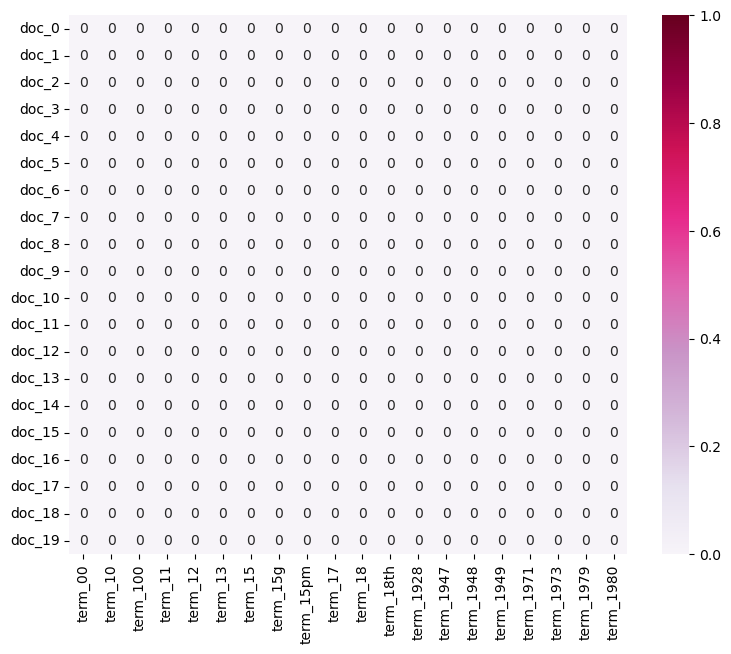

In [56]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [57]:
from sklearn.decomposition import PCA
print(X_counts.shape)
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
print(X_reduced.shape)

(3000, 5155)
(3000, 2)


In [58]:
X_reduced.shape


(3000, 2)

In [61]:
term_frequencies = []
print(X_counts.shape[1])
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))


5155


In [62]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [63]:
term_frequencies[0] #sum of first term: 00


1

C:\Users\picik\anaconda3\envs\datamining\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\picik\anaconda3\envs\datamining\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\picik\anaconda3\envs\datamining\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


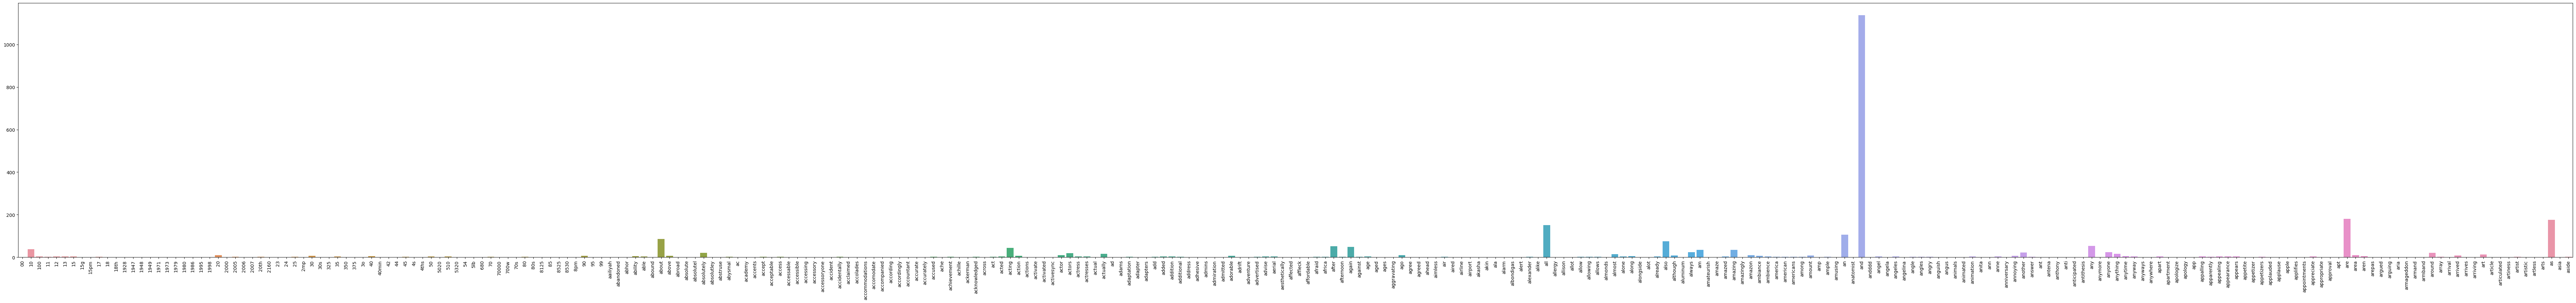

In [64]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [65]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['input']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['input']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['input']
document_to_transform_3.append(random_record_3)

In [66]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["Not loud enough and doesn't turn on like it should."]
['Integrated seamlessly with the Motorola RAZR phone.']
['I Was Hoping for More.']


In [67]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [68]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\picik\AppData\Local\Temp\ipykernel_20984\452772485.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
C:\Users\picik\AppData\Local\Temp\ipykernel_20984\452772485.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
C:\Users\picik\AppData\Local\Temp\ipykernel_20984\452772485.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this oper